In [199]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [200]:
df = pd.read_csv('smart_houses.csv')

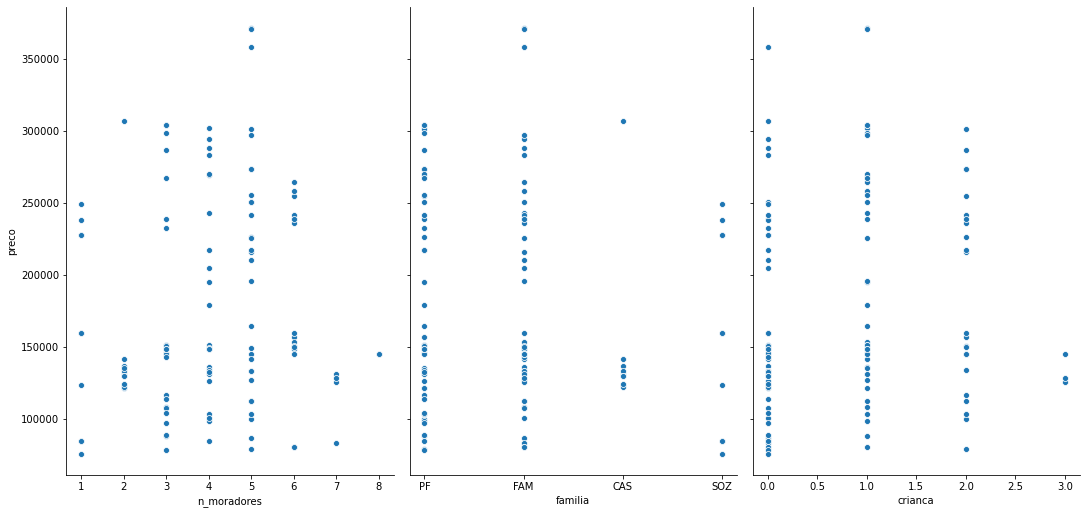

In [201]:
sns.pairplot(df, x_vars=['n_moradores','familia','crianca'], y_vars='preco', height=7, aspect=0.7)

In [202]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['classe'] = enc.fit_transform(df['classe'].values)
df['familia'] = enc.fit_transform(df['familia'].values)

In [203]:
X = df.drop(['preco','tipo_sh'], axis=1)

In [204]:
y = df['preco']

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

# Lasso

In [206]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [207]:
y_pred = reg.predict(X_test)

In [208]:
print ("Lasso score : ",reg.score(X_test, y_test))

Lasso score :  0.9999999997177385


In [209]:
from sklearn.metrics import mean_squared_error
print("Mean on test dataset: ", mean_squared_error(y_test,y_pred))

Mean on test dataset:  1.230873216855576


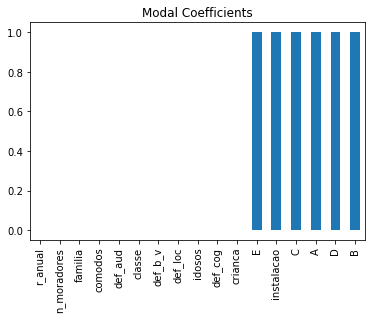

In [210]:
from pandas import Series
predictors = X_train.columns
coef = Series(reg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

In [211]:
predicted_prices = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.5597459263031181

In [212]:
print("Making predictions for the following 5 sample:")
print(X_test.head())
print("The predictions of the prices are:")
print(reg.predict(X_test.head()))

Making predictions for the following 5 sample:
     n_moradores  idosos  def_loc  def_b_v  def_cog  def_aud  comodos  \
97             3       0        1        0        0        0        6   
49             6       0        0        0        0        1        6   
111            6       2        0        0        0        0        8   
72             4       0        0        0        1        0        6   
71             5       0        0        0        1        0        7   

      r_anual  classe        A         B        C        D       E  \
97    60600.0       2  45035.0  76084.00      0.0  5888.85  5240.0   
49   108300.0       2  85520.0  34200.00      0.0  3406.00  1850.0   
111  135000.0       2  78956.0  65470.15  61200.0  7111.00  6998.0   
72    78520.0       2  78006.0  31200.00      0.0  2984.00  1230.0   
71    80800.0       2  70075.0  33500.00      0.0  3210.45  2100.0   

     instalacao  familia  crianca  
97        16632        2        1  
49        25360      

# Elastic-Net

In [213]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [214]:
regr = ElasticNet(random_state=0)
regr.fit(X_train,y_train)

ElasticNet(random_state=0)

In [215]:
print(regr.coef_)

[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -6.30266809e-06
  0.00000000e+00  9.99994485e-01  1.00002485e+00  9.99997624e-01
  1.00000717e+00  1.00007372e+00  9.99973907e-01 -0.00000000e+00
  0.00000000e+00]


In [216]:
print(regr.intercept_)

0.10921728939865716


In [217]:
pred = regr.predict(X_test)

In [218]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.4994229863173371

In [219]:
print("Making predictions for the following 5 sample:")
print(X_test.head())
print("The predictions of the prices are:")
print(regr.predict(X_test.head()))

Making predictions for the following 5 sample:
     n_moradores  idosos  def_loc  def_b_v  def_cog  def_aud  comodos  \
97             3       0        1        0        0        0        6   
49             6       0        0        0        0        1        6   
111            6       2        0        0        0        0        8   
72             4       0        0        0        1        0        6   
71             5       0        0        0        1        0        7   

      r_anual  classe        A         B        C        D       E  \
97    60600.0       2  45035.0  76084.00      0.0  5888.85  5240.0   
49   108300.0       2  85520.0  34200.00      0.0  3406.00  1850.0   
111  135000.0       2  78956.0  65470.15  61200.0  7111.00  6998.0   
72    78520.0       2  78006.0  31200.00      0.0  2984.00  1230.0   
71    80800.0       2  70075.0  33500.00      0.0  3210.45  2100.0   

     instalacao  familia  crianca  
97        16632        2        1  
49        25360      

# Decision Tree Regressor

In [220]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [221]:
print("Making predictions for the following 5 sample:")
print(X_test.head())
print("The predictions of the prices are:")
print(model.predict(X_test.head()))

Making predictions for the following 5 sample:
     n_moradores  idosos  def_loc  def_b_v  def_cog  def_aud  comodos  \
97             3       0        1        0        0        0        6   
49             6       0        0        0        0        1        6   
111            6       2        0        0        0        0        8   
72             4       0        0        0        1        0        6   
71             5       0        0        0        1        0        7   

      r_anual  classe        A         B        C        D       E  \
97    60600.0       2  45035.0  76084.00      0.0  5888.85  5240.0   
49   108300.0       2  85520.0  34200.00      0.0  3406.00  1850.0   
111  135000.0       2  78956.0  65470.15  61200.0  7111.00  6998.0   
72    78520.0       2  78006.0  31200.00      0.0  2984.00  1230.0   
71    80800.0       2  70075.0  33500.00      0.0  3210.45  2100.0   

     instalacao  familia  crianca  
97        16632        2        1  
49        25360      

In [222]:
predicted_prices = model.predict(X_test)
mean_absolute_error(y_test, predicted_prices)

19737.900789473686

# Ridge

In [223]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [224]:
print("Making predictions for the following 5 sample:")
print(X_test.head())
print("The predictions of the prices are:")
print(ridge.predict(X_test.head()))

Making predictions for the following 5 sample:
     n_moradores  idosos  def_loc  def_b_v  def_cog  def_aud  comodos  \
97             3       0        1        0        0        0        6   
49             6       0        0        0        0        1        6   
111            6       2        0        0        0        0        8   
72             4       0        0        0        1        0        6   
71             5       0        0        0        1        0        7   

      r_anual  classe        A         B        C        D       E  \
97    60600.0       2  45035.0  76084.00      0.0  5888.85  5240.0   
49   108300.0       2  85520.0  34200.00      0.0  3406.00  1850.0   
111  135000.0       2  78956.0  65470.15  61200.0  7111.00  6998.0   
72    78520.0       2  78006.0  31200.00      0.0  2984.00  1230.0   
71    80800.0       2  70075.0  33500.00      0.0  3210.45  2100.0   

     instalacao  familia  crianca  
97        16632        2        1  
49        25360      

In [225]:
pred_prices = ridge.predict(X_test)
mean_absolute_error(y_test, pred_prices)

5.3791970314801135e-06

# SVM

In [226]:
from sklearn import svm
svm_linear = svm.SVR(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear.predict(X_test)

array([149309.27858345, 150490.0839328 , 239266.36792557, 132652.22123138,
       133703.58016007, 109056.88720028, 146307.39242928, 237129.96850006,
       137918.22387497,  81429.60397141, 145587.37598412, 133394.34668343,
       149786.74272434, 284825.13192169, 217707.64879601,  98620.17889587,
       274595.0970401 , 154721.90153687, 164912.04361908, 157571.82333414,
       255981.96903412, 105835.65252773, 123445.83396523, 146419.5745639 ,
       142171.9979419 , 125124.21847241, 204733.93785278, 223086.28756516,
       255127.04867737, 302414.70562164, 160736.17477219, 371104.429552  ,
       122778.21037857, 210875.11038391,  80299.8190078 , 136562.42863457,
       145342.30437271, 240366.03315918])

In [227]:
predi_y = svm_linear.predict(X_test)
mean_absolute_error(y_test, predi_y)

819.3548121842695

In [228]:
d = {'Preço Real': y_test, 'LASSO': y_pred, 'Elastic-Net':pred, 
     'Regression Tree':predicted_prices, 'Ridge': pred_prices,
     'SVM Linear': predi_y}
comp = pd.DataFrame(data=d)
comp

,Preço Real,LASSO,Elastic-Net,Regression Tree,Ridge,SVM Linear
97,148879.85,148880.378864,148881.214399,148637.00,148879.850001,149309.278583
49,150336.00,150335.494635,150335.304066,159982.00,150336.000000,150490.083933
111,238695.15,238695.373777,238695.526863,195420.00,238695.149997,239266.367926
72,132423.00,132422.841954,132422.575777,135480.00,132423.000004,132652.221231
71,133445.45,133444.891901,133445.033076,133530.45,133445.450000,133703.580160
102,107556.25,107556.472912,107556.585843,108576.00,107556.250002,109056.887200
116,145408.75,145409.297272,145409.321612,112353.20,145408.750006,146307.392429
79,238038.00,238037.985630,238037.724141,227869.55,238037.999999,237129.968500
30,137016.00,137015.957640,137016.502848,150307.15,137015.999991,137918.223875
82,80493.15,80492.709542,80492.678179,98287.00,80493.149999,81429.603971
